方法一：递归。看上去很美，但是效率实在太差！

In [1]:
def binominal(n):
    if n == 1:
        return [1, 1]
    if n == 2:
        return [1, 2, 1]
    if n == 3:
        return [1, 3, 3, 1]
    if n == 4:
        return [1, 4, 6, 4, 1]
    if n == 5:
        return [1, 5, 10, 10, 5, 1]
    if n > 5:
        temp = [(binominal(n-1)[i] + binominal(n-1)[i+1]) for i in range(n-1)]
        return [1] +temp + [1]

In [2]:
binominal(6)

[1, 6, 15, 20, 15, 6, 1]

方法二：for loop + dict 接收数据

In [3]:
binorm = {
    1:[1, 1],
    2:[1, 2, 1],
    3:[1, 3, 3, 1],
    4:[1, 4, 6, 4, 1],
    5:[1, 5, 10, 10, 5, 1]
         }

In [4]:
for n in range(6, 201):
    temp = [binorm[n-1][i] + binorm[n-1][i+1] for i in range(n-1)]
    binorm[n] = [1] + temp + [1]
        

In [5]:
binorm[20]

[1,
 20,
 190,
 1140,
 4845,
 15504,
 38760,
 77520,
 125970,
 167960,
 184756,
 167960,
 125970,
 77520,
 38760,
 15504,
 4845,
 1140,
 190,
 20,
 1]

## 根据二项式展开可以进行以下推算。

一枚硬币抛 10 次，出现 6 次正面 4 次反面的概率为：

In [6]:
_10 = sum(binorm[10])
_6_4 = binorm[10][4]
print(_6_4/_10)

0.205078125


一枚硬币抛 100 次，出现 60 次正面 40 次反面的概率为：

In [7]:
_100 = sum(binorm[100])
_60_40 = binorm[100][40]
print(_60_40/_100)

0.010843866711637987


一枚硬币抛 200 次，出现 120 次正面 80 次反面的概率为：

In [8]:
_200 = sum(binorm[200])
_120_80 = binorm[200][120]
print(_120_80/_200)

0.0010251040221101832


下面计算一枚硬币抛 10 次，出现各种情况的概率。

In [9]:
P_10 = {}
sum_10 = sum(binorm[10])
for i in range(10, -1, -1):
    key = str(i) + '(+)' + str(10-i) + '(-)'
    P_10[key] = binorm[10][i] / sum_10

In [10]:
print(P_10)

{'4(+)6(-)': 0.205078125, '3(+)7(-)': 0.1171875, '5(+)5(-)': 0.24609375, '7(+)3(-)': 0.1171875, '1(+)9(-)': 0.009765625, '2(+)8(-)': 0.0439453125, '8(+)2(-)': 0.0439453125, '0(+)10(-)': 0.0009765625, '10(+)0(-)': 0.0009765625, '9(+)1(-)': 0.009765625, '6(+)4(-)': 0.205078125}


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
P_10_Series = pd.Series(P_10)

In [13]:
P_10_Series

0(+)10(-)    0.000977
1(+)9(-)     0.009766
10(+)0(-)    0.000977
2(+)8(-)     0.043945
3(+)7(-)     0.117188
4(+)6(-)     0.205078
5(+)5(-)     0.246094
6(+)4(-)     0.205078
7(+)3(-)     0.117188
8(+)2(-)     0.043945
9(+)1(-)     0.009766
dtype: float64

In [14]:
P_10_Series.index

Index(['0(+)10(-)', '1(+)9(-)', '10(+)0(-)', '2(+)8(-)', '3(+)7(-)',
       '4(+)6(-)', '5(+)5(-)', '6(+)4(-)', '7(+)3(-)', '8(+)2(-)', '9(+)1(-)'],
      dtype='object')

In [15]:
new_index = ['0(+)10(-)', '1(+)9(-)', '2(+)8(-)', '3(+)7(-)',
       '4(+)6(-)', '5(+)5(-)', '6(+)4(-)', '7(+)3(-)', '8(+)2(-)', '9(+)1(-)', '10(+)0(-)']

In [16]:
P_10_Series = P_10_Series.reindex(index=new_index)

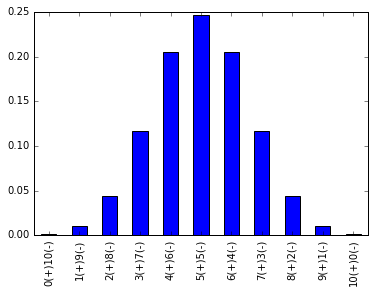

In [17]:
P_10_Series.plot(kind='bar' )

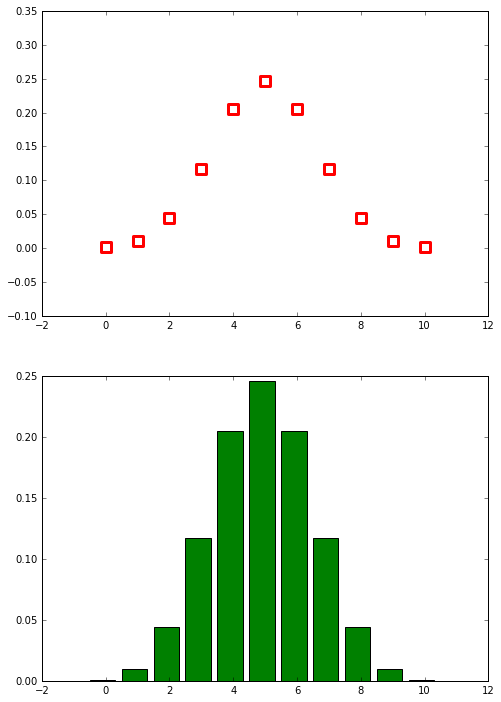

In [37]:
X = np.arange(11)
Y = P_10_Series.values
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
ax1.scatter(X, Y, s=100, color = 'w', marker = 's', edgecolors = 'r', linewidth = 3)
ax2.bar(X-0.5, Y, color = 'green')
fig.set_size_inches(8, 12)